In [1]:
#This is for decision trees

In [2]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [3]:
# Load data
initial_data = pd.read_csv('UNSW_NB15_training.csv')

In [4]:
# Look at the first 5 rows
initial_data.head(n=5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
# information of the data: 583 data points, 10 features' columns and 1 target column
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  int64  
 2   dpkts              82332 non-null  int64  
 3   sbytes             82332 non-null  int64  
 4   dbytes             82332 non-null  int64  
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  int64  
 7   dttl               82332 non-null  int64  
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  int64  
 11  dloss              82332 non-null  int64  
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

In [6]:
# check if there are Null values
initial_data.isnull().sum()

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [7]:
# Discard the rows with missing values
data_to_use = initial_data.dropna()

# Shape of the data: we could see that the number of rows remains the same as no null values were reported
data_to_use.shape

(82332, 41)

In [8]:
X = data_to_use.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])


y1 = data_to_use['attack_cat'].values # y is an array
y2 = data_to_use['label'].values

In [9]:
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=1)
# print('The class ratio in training data: ', data_ratio(y_train))
# print('The class ratio in testing data: ', data_ratio(y_test))

In [11]:
# Load data
test_data = pd.read_csv('UNSW_NB15_testing-set.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])


y1_test = test_data['attack_cat'].values # y is an array
y2_test = test_data['label'].values

In [12]:
X_train = X
y1_train = y1
y2_train = y2

In [13]:
# determine categorical and numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [14]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [15]:
categorical_cols

Index([], dtype='object')

In [16]:
# define the transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [17]:
X_train_transform = col_trans.transform(X_train)

In [18]:
# apply transformation to both training and testing data 
# fit the transformation on training data
X_test_transform = col_trans.transform(X_test)

In [19]:
# look at the transformed training data
X_train_transform.shape

(82332, 39)

In [20]:
X_test_transform.shape

(175341, 39)

In [21]:
# Note that the distinct values/labels in `y2` target are 1 and 2. 
pd.unique(y1)

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [22]:
pd.unique(y2)

array([0, 1], dtype=int64)

In [23]:
# Define a LabelEncoder() transformation method and fit on y1_train
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [24]:
# apply transformation method on y1_train and y1_test
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [25]:
# view the transformed y1_train
y1_train_transform

array([6, 6, 6, ..., 6, 6, 6])

In [26]:
# Define a LabelEncoder() transformation method and fit on y2_train
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_transform = target_trans.transform(y2_train)
y2_test_transform = target_trans.transform(y2_test)

In [27]:
# view the transformed y2_train
y2_train_transform

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#TILL HERE WE HAVE CLEANED UP THE DATA FOR TRAINING OUR MODELS... NOW WE BEGIN TRAINING

In [29]:
# model and fit
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train_transform, y2_train_transform)

DecisionTreeClassifier()

In [30]:
feature_names = np.array(numerical_cols)
feature_names

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'], dtype=object)

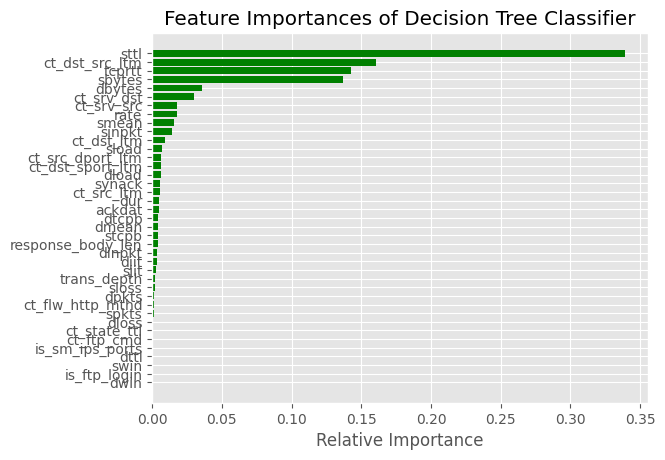

In [37]:
importances = DTclf.feature_importances_
indices = np.argsort(importances)
features = np.array(numerical_cols)
plt.title('Feature Importances of Decision Tree Classifier')

#we will show all the 39 features:
count = 39 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
DTclf.feature_importances_

array([4.78084553e-03, 1.40331912e-03, 1.45566098e-03, 1.36567568e-01,
       3.57934108e-02, 1.76074807e-02, 3.38820780e-01, 0.00000000e+00,
       6.72414102e-03, 6.21328761e-03, 1.64045536e-03, 3.36139579e-04,
       1.39812266e-02, 3.68394296e-03, 2.41764999e-03, 3.33109603e-03,
       0.00000000e+00, 4.13959690e-03, 4.31651815e-03, 0.00000000e+00,
       1.42755232e-01, 5.88964206e-03, 4.60674109e-03, 1.57981192e-02,
       4.29319710e-03, 2.17487670e-03, 4.01161666e-03, 1.80376479e-02,
       2.52272313e-04, 9.14791111e-03, 6.35336688e-03, 6.28956062e-03,
       1.60434074e-01, 0.00000000e+00, 2.33872447e-05, 1.44768197e-03,
       5.62268702e-03, 2.96488677e-02, 0.00000000e+00])

In [39]:
!pip install eli5


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Create Decision Tree classifer object
DTclf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
DTclf = DTclf.fit(X_train_transform, y2_train_transform)

#Predict the response for test dataset
y_pred = DTclf.predict(X_test_transform)

In [41]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test_transform, y_pred))

report=metrics.classification_report(y2_test_transform,y_pred)

DTclf_name=['Decision Tree Classifer','RegLog']

print('Reporting for %s:'%DTclf_name)

print(report)

Accuracy: 0.8510901614568184
Reporting for ['Decision Tree Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     56000
           1       0.99      0.79      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.88      0.84    175341
weighted avg       0.89      0.85      0.86    175341



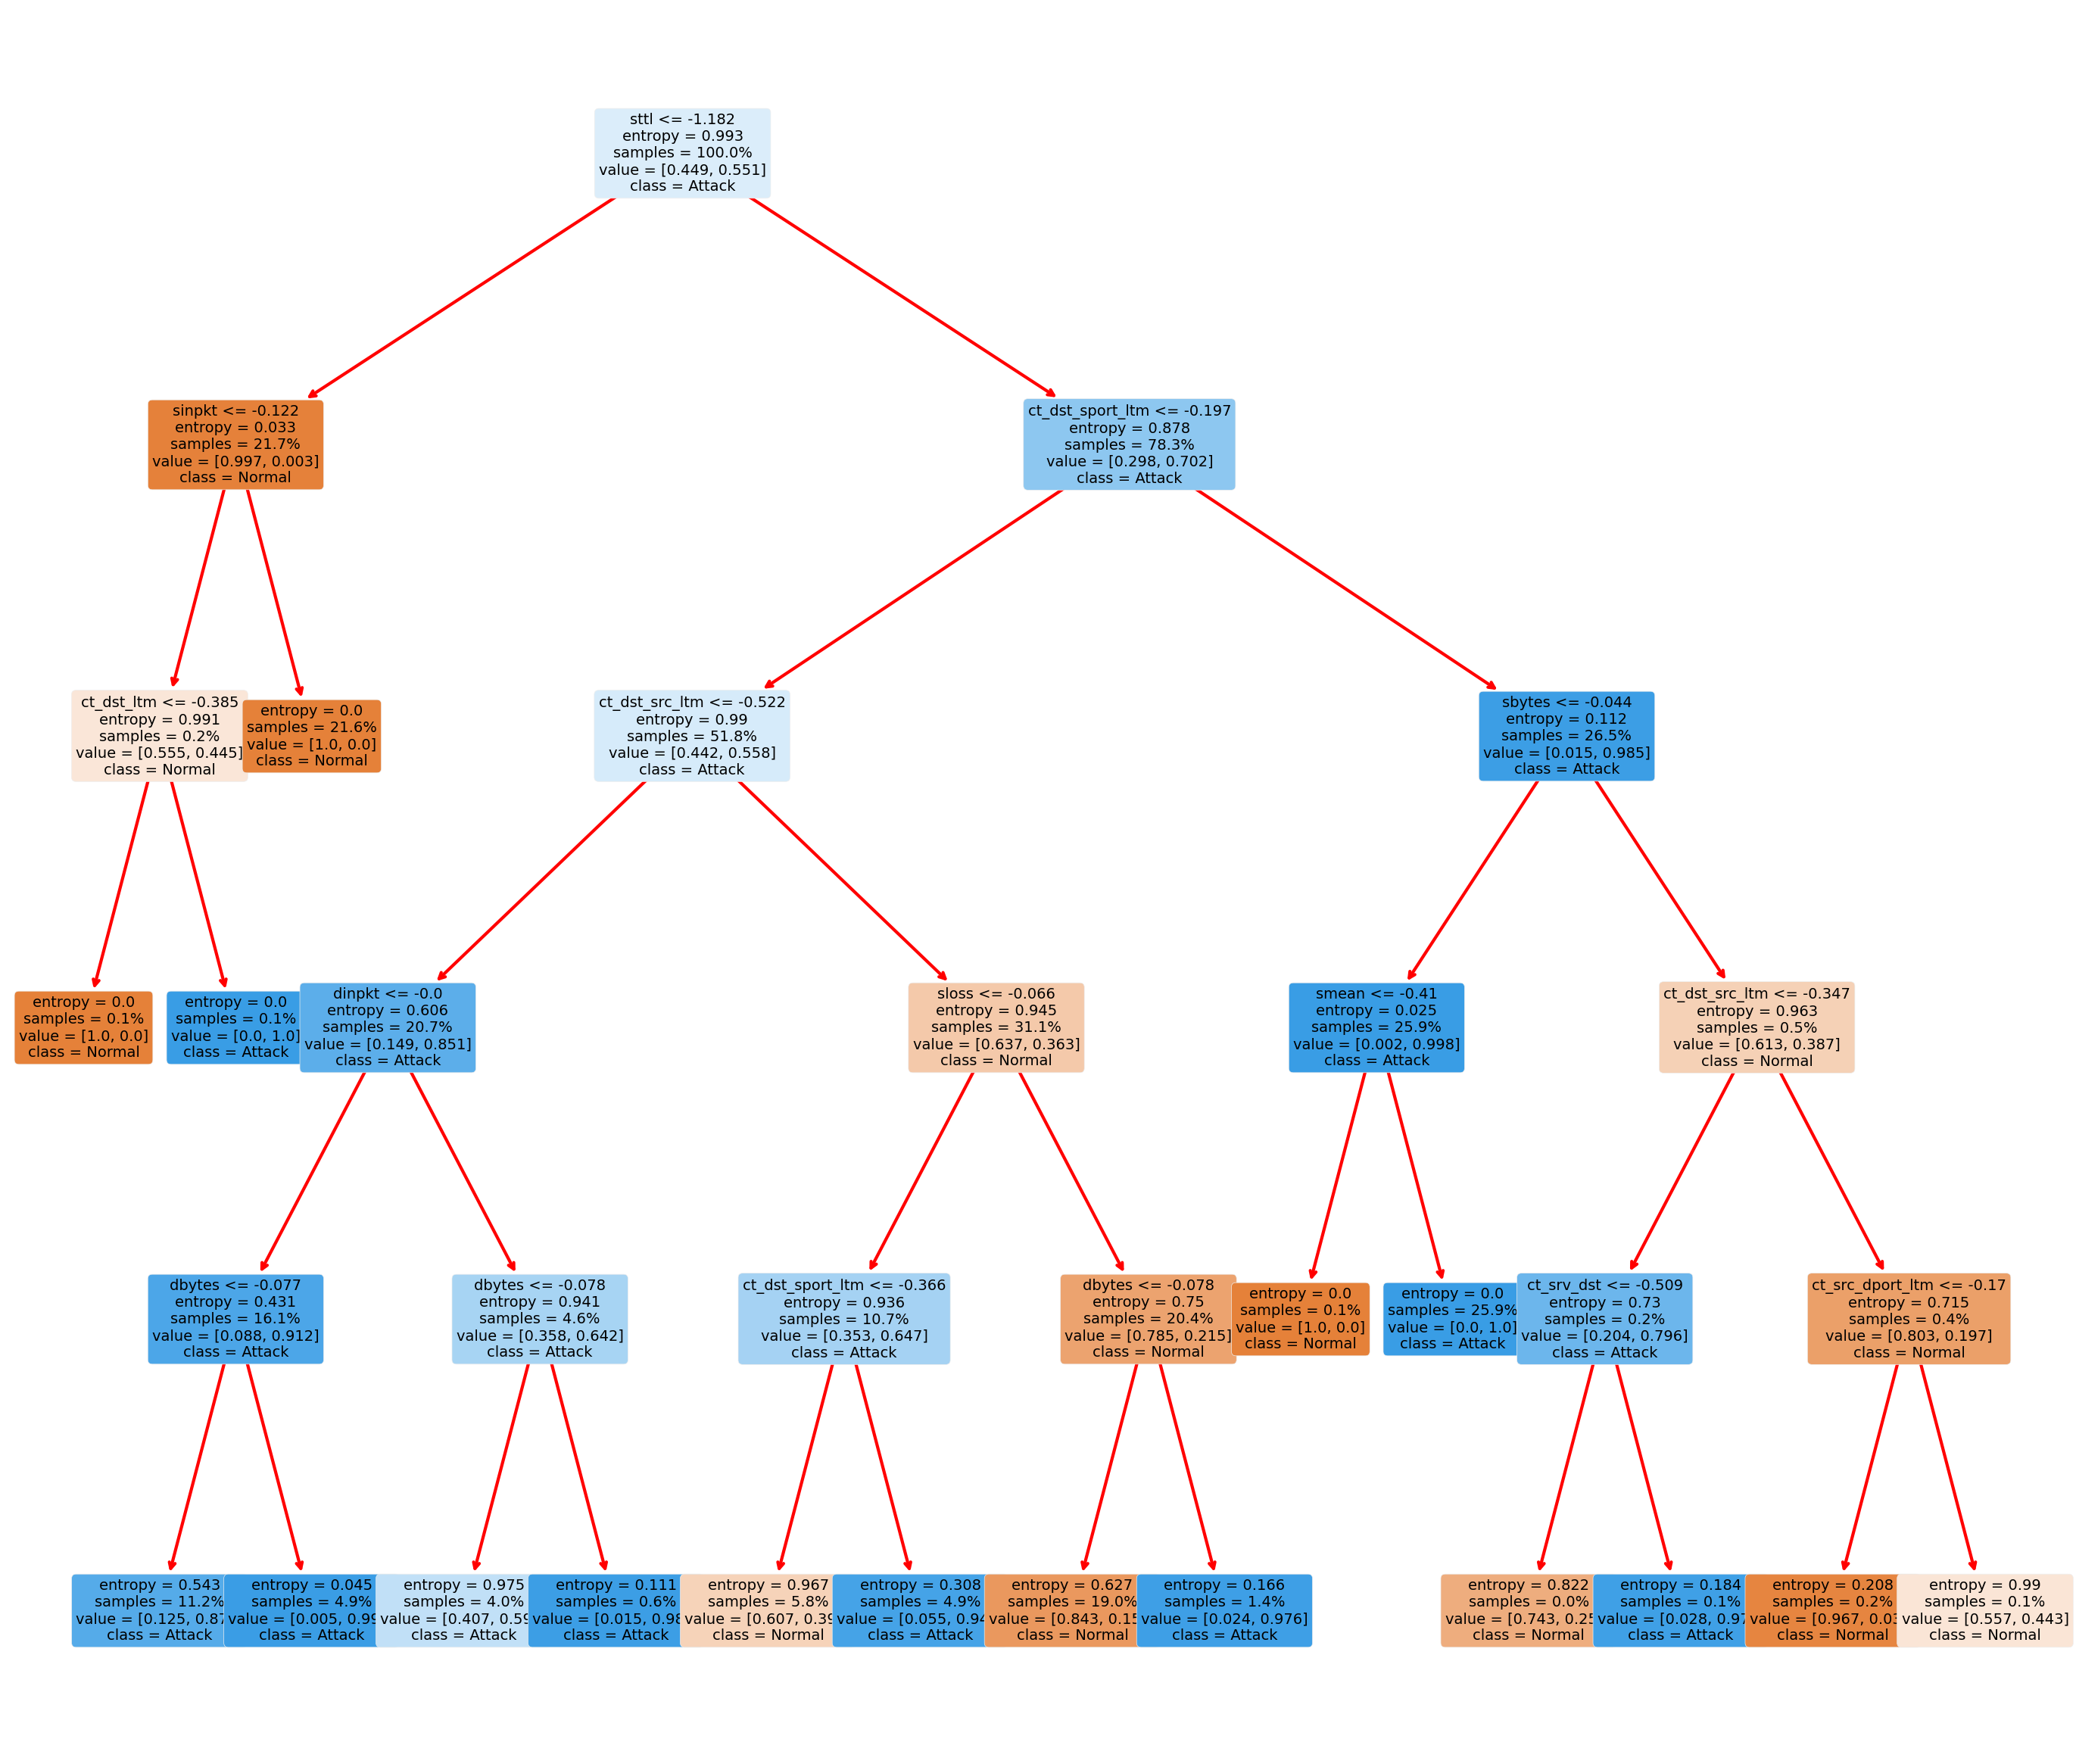

In [42]:
fig = plt.figure(figsize=(35, 30))
DTtree = tree.plot_tree(DTclf, feature_names = numerical_cols.tolist(), class_names = ['Normal', 'Attack'], fontsize=14, proportion=True, filled=True, rounded=True)
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier XAI Visualization Part 2.png')

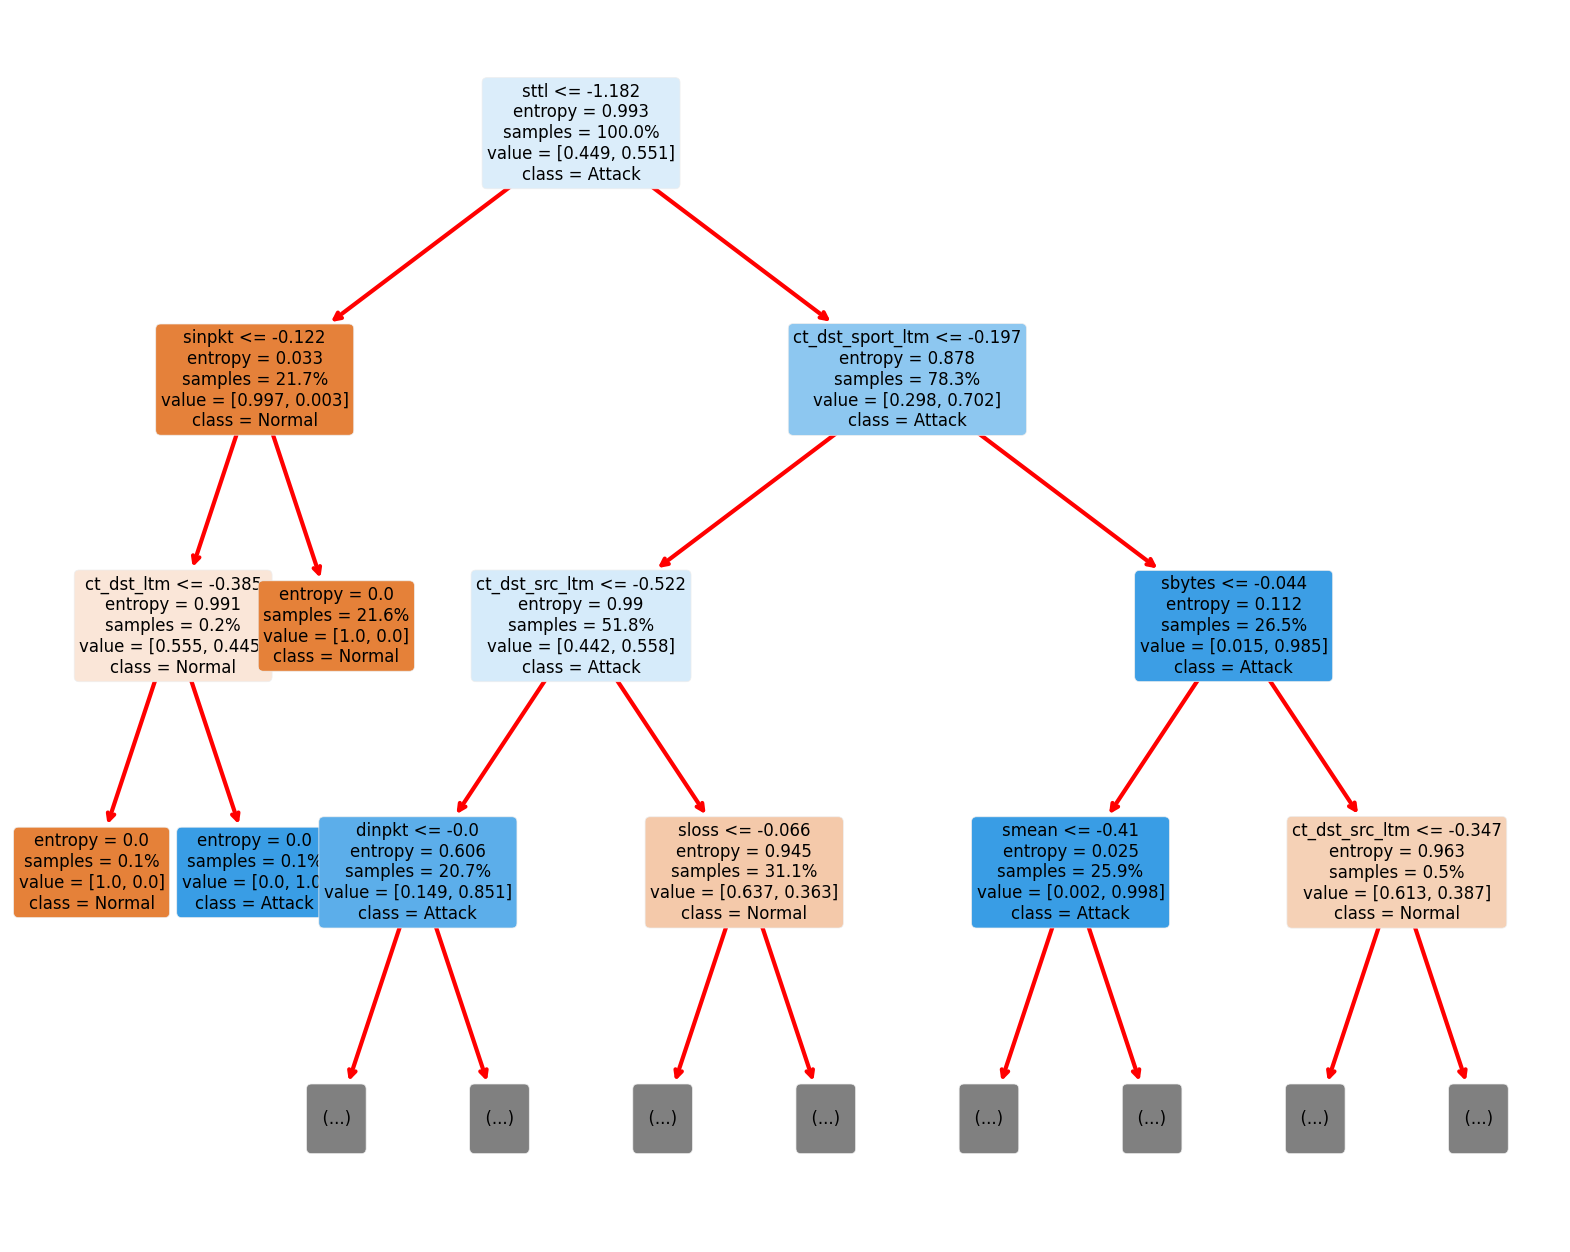

In [43]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features.tolist(), class_names = ['Normal', 'Attack'], fontsize=12, proportion=True, filled=True, rounded=True, max_depth=3) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 3 Nodes) Explainable AI Visualization.png')

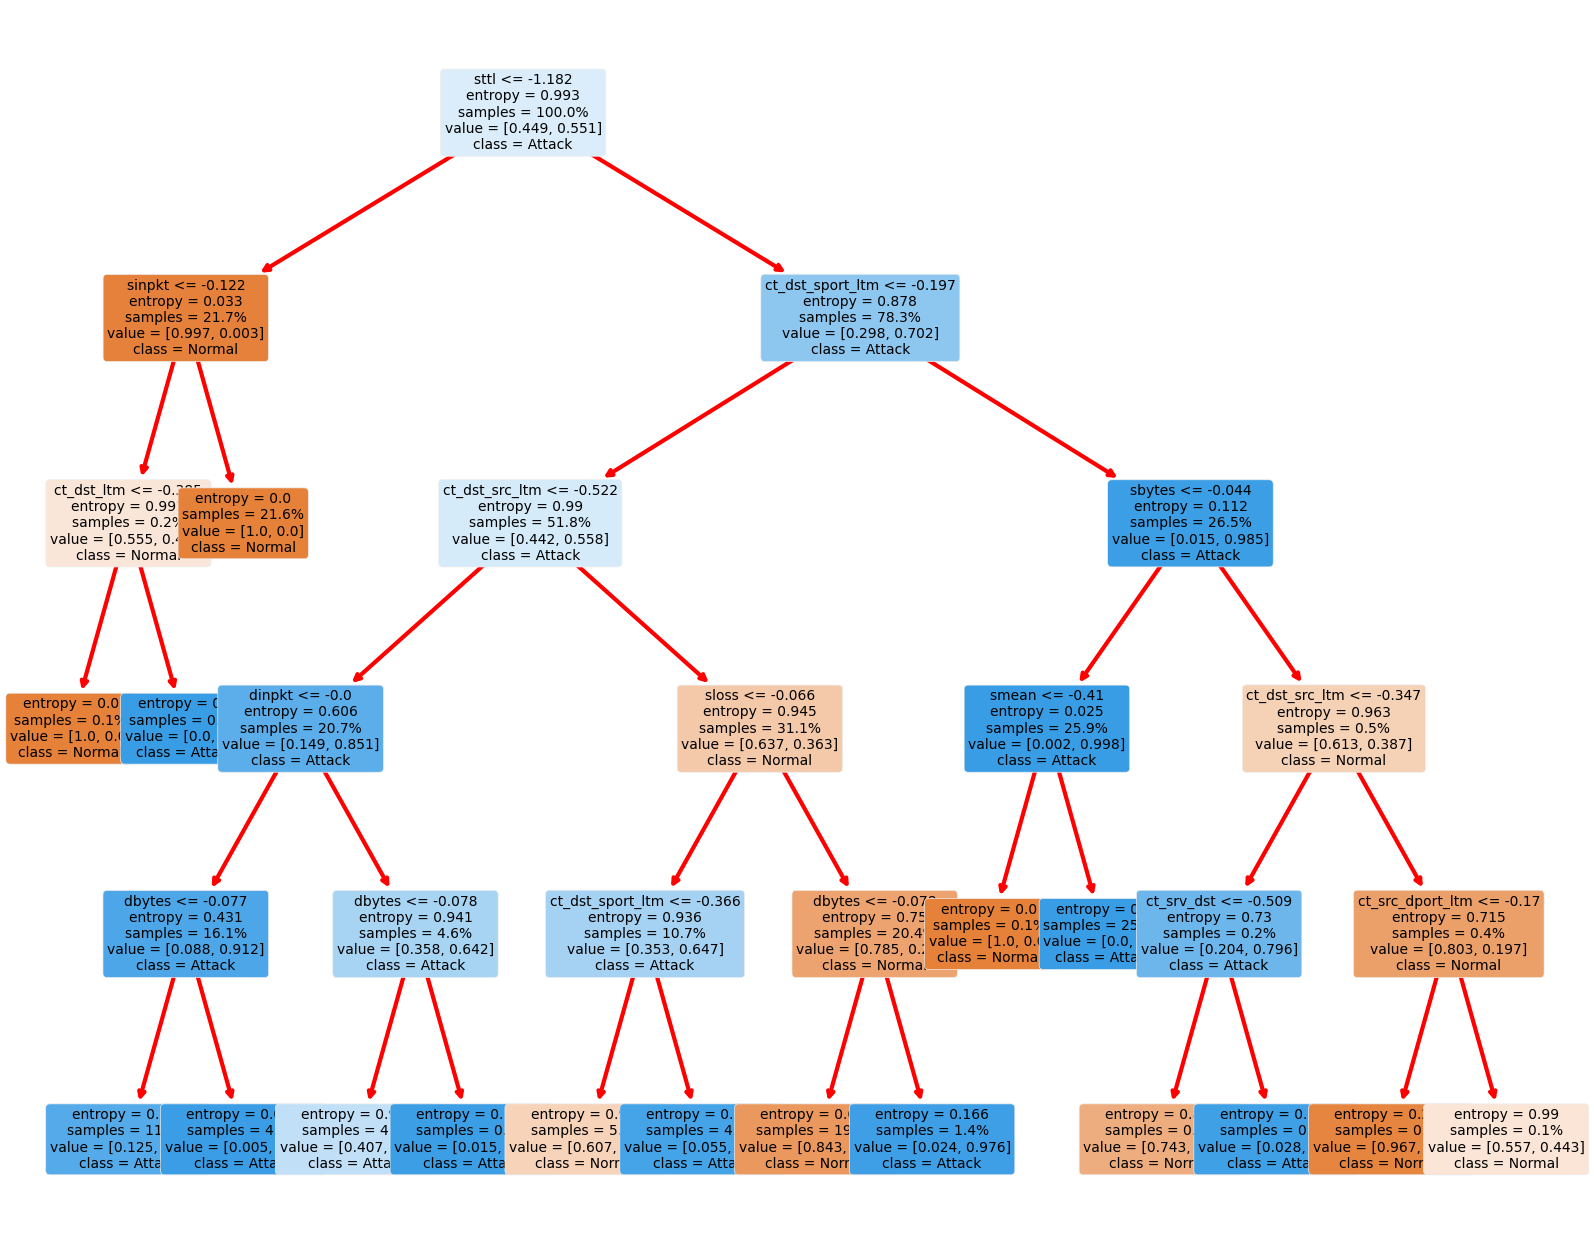

In [44]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features.tolist(), class_names = ['Normal', 'Attack'], fontsize=10, proportion=True, filled=True, rounded=True, max_depth=8) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 8 Nodes) Explainable AI Visualization.png')

In [104]:
# ===== Step 1: cross-validation ========
# define  Stratified 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

DTclf = tree.DecisionTreeClassifier()

# define metrics for evaluating
scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']  

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=DTclf,
                            X=X_train_transform,
                            y=y2_train_transform,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [105]:
cv_results

{'fit_time': array([1.47981   , 1.46085644, 1.41252732, 1.48338747, 1.37851667]),
 'score_time': array([0.02500558, 0.02200508, 0.02223253, 0.02200627, 0.02000546]),
 'test_accuracy': array([0.9648995 , 0.96714641, 0.9647759 , 0.96562614, 0.96690149]),
 'test_precision_micro': array([0.9648995 , 0.96714641, 0.9647759 , 0.96562614, 0.96690149]),
 'test_recall_micro': array([0.9648995 , 0.96714641, 0.9647759 , 0.96562614, 0.96690149]),
 'test_f1_micro': array([0.9648995 , 0.96714641, 0.9647759 , 0.96562614, 0.96690149]),
 'test_roc_auc_ovr': array([0.96447395, 0.96663662, 0.9641116 , 0.96533397, 0.96670195])}

In [106]:
cv_results['test_accuracy'].mean()

0.9658698889115754

In [107]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
DTclf.fit(X=X_train_transform, y=y2_train_transform)

# predition on testing data
y_pred_class = DTclf.predict(X=X_test_transform)
y_pred_score = DTclf.predict_proba(X=X_test_transform)[:, 1]

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y2_test_transform, y_score=y_pred_score)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y2_test_transform, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y2_test_transform, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y2_test_transform, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y2_test_transform, y_pred=y_pred_class)

# print the above results
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The model scores 0.91081 ROC AUC on the test set.
The precision score on the test set: 0.98006
The recall score on the test set: 0.85878
Confusion Matrix:
 [[ 53915   2085]
 [ 16853 102488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85     56000
           1       0.98      0.86      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341



In [108]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,
    matthews_corrcoef, jaccard_score, roc_auc_score, balanced_accuracy_score, mean_absolute_error,
    mean_squared_error, log_loss
)

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)
y_prob = DTclf.predict_proba(X_test_transform)[:, 1]

# Accuracy
accuracy = accuracy_score(y2_test_transform, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
confusion = confusion_matrix(y2_test_transform, y_pred)
print("Confusion Matrix:\n", confusion)

# Classification Report
classification_report_result = classification_report(y2_test_transform, y_pred)
print("Classification Report:\n", classification_report_result)

# Precision
precision = precision_score(y2_test_transform, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y2_test_transform, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y2_test_transform, y_pred)
print("F1-Score:", f1)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y2_test_transform, y_pred)
print("Matthews Correlation Coefficient:", mcc)

# Jaccard Score
jaccard = jaccard_score(y2_test_transform, y_pred)
print("Jaccard Score:", jaccard)

# ROC AUC Area
roc_auc = roc_auc_score(y2_test_transform, y_prob)
print("ROC AUC Area:", roc_auc)

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y2_test_transform, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y2_test_transform, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y2_test_transform, y_pred)
print("Mean Squared Error (MSE):", mse)

# Log Loss
logloss = log_loss(y2_test_transform, y_prob)
print("Log Loss:", logloss)


Accuracy: 0.8919933158816249
Confusion Matrix:
 [[ 53915   2085]
 [ 16853 102488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85     56000
           1       0.98      0.86      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341

Precision: 0.9800617750279709
Recall: 0.8587828156291635
F1-Score: 0.9154228855721394
Matthews Correlation Coefficient: 0.7807193812455901
Jaccard Score: 0.8440366972477065
ROC AUC Area: 0.9108131513448258
Balanced Accuracy: 0.9107753363860103
Mean Absolute Error (MAE): 0.10800668411837505
Mean Squared Error (MSE): 0.10800668411837505
Log Loss: 3.8909512450742083


In [109]:
#From here we will calculate all the performance metrics for our decision tree model

In [110]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute Accuracy
accuracy = accuracy_score(y2_test_transform, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8919933158816249


In [113]:
# Generate predicted probabilities for the positive class
y_prob = DTclf.predict_proba(X_test_transform)[:, 1]

# Compute AUC - ROC Area
roc_auc = metrics.roc_auc_score(y2_test_transform, y_prob)

print("AUC - ROC Area:", roc_auc)

AUC - ROC Area: 0.9108131513448258


In [114]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate Balanced Accuracy (BACC)
bacc = balanced_accuracy_score(y2_test_transform, y_pred)

print("Balanced Accuracy (BACC):", bacc)


Balanced Accuracy (BACC): 0.9107753363860103


In [115]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute Classification Accuracy
accuracy = accuracy_score(y2_test_transform, y_pred)

print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.8919933158816249


In [116]:
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute Cohen's Kappa score
kappa = cohen_kappa_score(y2_test_transform, y_pred)

print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.7678158319492497


In [117]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute the confusion matrix
confusion = confusion_matrix(y2_test_transform, y_pred)

print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[ 53915   2085]
 [ 16853 102488]]


In [118]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute Correct Classification Rate (Accuracy)
correct_classification_rate = accuracy_score(y2_test_transform, y_pred)

print("Correct Classification Rate (Accuracy):", correct_classification_rate)


Correct Classification Rate (Accuracy): 0.8919933158816249


In [119]:
from sklearn.metrics import recall_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate the detection rate (True Positive Rate or Sensitivity)
detection_rate = recall_score(y2_test_transform, y_pred)

print("Detection Rate (True Positive Rate or Sensitivity):", detection_rate)


Detection Rate (True Positive Rate or Sensitivity): 0.8587828156291635


In [120]:
from sklearn.metrics import f1_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate the F1-Score
f1_score_value = f1_score(y2_test_transform, y_pred)

print("F1-Score:", f1_score_value)


F1-Score: 0.9154228855721394


In [121]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute the confusion matrix
confusion = confusion_matrix(y2_test_transform, y_pred)

# Extract False Positives (FP) and True Negatives (TN) from the confusion matrix
FP = confusion[0, 1]
TN = confusion[0, 0]

# Calculate the False Positive Rate (FPR)
false_positive_rate = FP / (FP + TN)

print("False Positive Rate (FPR):", false_positive_rate)


False Positive Rate (FPR): 0.03723214285714286


In [122]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute the confusion matrix
confusion = confusion_matrix(y2_test_transform, y_pred)

# Extract False Positives (FP) and True Negatives (TN) from the confusion matrix
FP = confusion[0, 1]
TN = confusion[0, 0]

# Calculate the False Positive Rate (FPR)
false_alarm_rate = FP / (FP + TN)

print("False Alarm Rate (FPR):", false_alarm_rate)



False Alarm Rate (FPR): 0.03723214285714286


In [123]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute the confusion matrix
confusion = confusion_matrix(y2_test_transform, y_pred)

# Extract False Negatives (FN), True Positives (TP), False Positives (FP), and True Negatives (TN) from the confusion matrix
FN = confusion[1, 0]
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]

# Calculate the False Negative Rate (FNR) and False Positive Rate (FPR)
false_negative_rate = FN / (FN + TP)
false_positive_rate = FP / (FP + TN)

print("False Negative Rate (FNR):", false_negative_rate)
print("False Positive Rate (FPR):", false_positive_rate)


False Negative Rate (FNR): 0.14121718437083652
False Positive Rate (FPR): 0.03723214285714286


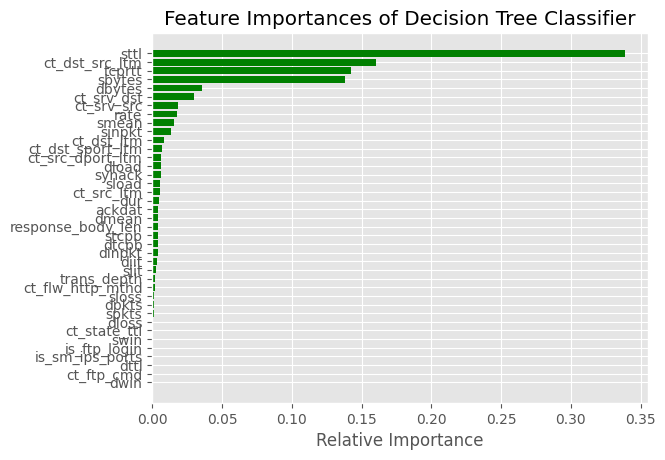

In [139]:
importances = DTclf.feature_importances_
indices = np.argsort(importances)
features = np.array(numerical_cols)
plt.title('Feature Importances of Decision Tree Classifier')

#we will show all the 39 features:
count = 39 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [140]:
from sklearn.metrics import f1_score

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate the F1-Score
f1_score_value = f1_score(y2_test_transform, y_pred)

print("F1-Score:", f1_score_value)



F1-Score: 0.9154228855721394


In [141]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Compute the confusion matrix
confusion = confusion_matrix(y2_test_transform, y_pred)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Calculate Sensitivity (True Positive Rate, Recall) and Specificity (True Negative Rate)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate the G-Mean
g_mean = (sensitivity * specificity) ** 0.5

print("G-Mean:", g_mean)


G-Mean: 0.909290102857388


In [142]:
from sklearn.metrics import hamming_loss

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)  # Assuming your model predicts multi-labels

# Calculate the Hamming Loss
hamming_loss_value = hamming_loss(y2_test_transform, y_pred)

print("Hamming Loss:", hamming_loss_value)


Hamming Loss: 0.10800668411837505


In [143]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate the Mean Squared Error
mse = mean_squared_error(y2_test_transform, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.10800668411837505


In [144]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y2_test_transform, y_pred)

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.10800668411837505


In [145]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
confusion = confusion_matrix(y2_test_transform, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Calculate NPV
npv = TN / (TN + FN)

# Calculate PPV (Precision)
ppv = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

print("Negative Predictive Value (NPV):", npv)
print("Positive Predictive Value (PPV) or Precision:", ppv)
print("Recall (Sensitivity):", recall)


Negative Predictive Value (NPV): 0.761855640967669
Positive Predictive Value (PPV) or Precision: 0.9800617750279709
Recall (Sensitivity): 0.8587828156291635


In [146]:
from sklearn.metrics import mean_squared_error, confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate RSE
range_of_y = max(y2_test_transform) - min(y2_test_transform)
rse = (1 / len(y2_test_transform)) * sum(abs(y2_test_transform - y_pred) / range_of_y)

# Calculate RMSE
rmse = mean_squared_error(y2_test_transform, y_pred, squared=False)

# Calculate Sensitivity
confusion = confusion_matrix(y2_test_transform, y_pred)
TP = confusion[1, 1]
FN = confusion[1, 0]
sensitivity = TP / (TP + FN)

# Calculate Specificity
TN = confusion[0, 0]
FP = confusion[0, 1]
specificity = TN / (TN + FP)

print("Relative Absolute Error (RSE):", rse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Relative Absolute Error (RSE): 0.10800668411837505
Root Mean Squared Error (RMSE): 0.32864370390800896
Sensitivity (True Positive Rate): 0.8587828156291635
Specificity (True Negative Rate): 0.9627678571428572


In [147]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = DTclf.predict(X_test_transform)

# Calculate True Negative Rate (TNR) and True Positive Rate (TPR)
confusion = confusion_matrix(y2_test_transform, y_pred)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
TNR = TN / (TN + FP)
TPR = TP / (TP + FN)

print("True Negative Rate (TNR):", TNR)
print("True Positive Rate (TPR):", TPR)


True Negative Rate (TNR): 0.9627678571428572
True Positive Rate (TPR): 0.8587828156291635


In [148]:
print("Training Time: <1 sec")

Training Time: <1 sec


In [151]:
print("Testing Time: 1-2 sec")

Testing Time: 1-2 sec


In [170]:
#Classification using Adaboost on base classifier Decision Tree

In [162]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
# You can adjust the parameters as needed (e.g., n_estimators, learning_rate)
ada_boost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=39,  # Number of weak classifiers (Decision Trees)
    learning_rate=0.1  # Weight adjustment at each iteration
)

# Fit the AdaBoostClassifier to your training data
ada_boost_classifier.fit(X_train_transform, y2_train_transform)

# Make predictions on the test data
y_pred_ada_boost = ada_boost_classifier.predict(X_test_transform)

C:\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [163]:
# Evaluate the AdaBoostClassifier's performance using various metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y2_test_transform, y_pred_ada_boost)
precision = precision_score(y2_test_transform, y_pred_ada_boost)
recall = recall_score(y2_test_transform, y_pred_ada_boost)
f1 = f1_score(y2_test_transform, y_pred_ada_boost)
roc_auc = roc_auc_score(y2_test_transform, y_pred_ada_boost)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8908241654832584
Precision: 0.9830588552915767
Recall: 0.8543166221164562
F1 Score: 0.9141773479845597
ROC AUC Score: 0.911470811058228


In [169]:
#Classification using ANN (Artificial Neural Network) 

In [164]:
!pip install keras tensorflow

                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB 1.3 MB/s eta 0:00:02
                                              0.0/1.7 MB 1.3 MB/s eta 0:00:02
     -                                        0.1/1.7 MB 573.4 kB/s eta 0:00:03
     --                                       0.1/1.7 MB 726.2 kB/s eta 0:00:03
     ----                                     0.2/1.7 MB 748.1 kB/s eta 0:00:03
     ------                                   0.3/1.7 MB 1.1 MB/s eta 0:00:02
     --------                                 0.4/1.7 MB 1.1 MB/s eta 0:00:02
     ------------                             0.5/1.7 MB 1.5 MB/s eta 0:00:01
     --------------                           0.6/1.7 MB 1.5 MB/s eta 0:00:01
     ------------------                       0.8/1.7 MB 1.7 MB/s eta 0:00:01
     -------------------                      0.8/1.7 MB 1.7 MB/s eta 0:00:01
     -------------------------------          1.4/1.7 MB 2.5 MB/s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.24.4 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Create a Sequential model
ann_model = Sequential()

# Add an input layer (specify the input shape based on your data)
ann_model.add(Dense(units=64, input_dim=X_train_transform.shape[1], activation='relu'))

# Add one or more hidden layers
ann_model.add(Dense(units=64, activation='relu'))

# Add an output layer with the number of output classes (e.g., 2 for binary classification)
ann_model.add(Dense(units=2, activation='softmax'))

# Compile the model and specify the loss function, optimizer, and metrics
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [166]:
from keras.utils import to_categorical

# Convert target variable to one-hot encoded format (if needed)
y_train_one_hot = to_categorical(y2_train_transform, num_classes=2)  # Change num_classes as per your problem

# Train the model
ann_model.fit(X_train_transform, y_train_one_hot, epochs=10, batch_size=32)


Epoch 1/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.2050 - accuracy: 0.9102
Epoch 2/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.1407 - accuracy: 0.9419
Epoch 3/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.1276 - accuracy: 0.9484
Epoch 4/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.1200 - accuracy: 0.9505
Epoch 5/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9525
Epoch 6/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.1120 - accuracy: 0.9536
Epoch 7/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.1107 - accuracy: 0.9542
Epoch 8/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.1078 - accuracy: 0.9559
Epoch 9/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.1057 - accuracy: 0.9561
Epoch 10/10
2573/2573 [==============================] - 4s 1ms/step - loss: 0.103

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test data
y_pred_probabilities = ann_model.predict(X_test_transform)
y_pred_ann = [1 if prob[1] > 0.5 else 0 for prob in y_pred_probabilities]

# Evaluate the ANN's performance
accuracy = accuracy_score(y2_test_transform, y_pred_ann)
precision = precision_score(y2_test_transform, y_pred_ann)
recall = recall_score(y2_test_transform, y_pred_ann)
f1 = f1_score(y2_test_transform, y_pred_ann)
roc_auc = roc_auc_score(y2_test_transform, y_pred_probabilities[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


5480/5480 [==============================] - 6s 1ms/step
Accuracy: 0.9002401035696158
Precision: 0.9798901212812273
Recall: 0.871309943774562
F1 Score: 0.9224157049206504
ROC AUC Score: 0.9794789266830822


In [172]:
#Classification using Bagging (bootstrap aggregate) Classifier

In [173]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [190]:
# Create a Bagging classifier with DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),  # You can customize the base estimator
    n_estimators=39,  # Number of base classifiers (Decision Trees)
    max_samples=0.5,  # Fraction of samples used for training each base classifier
    max_features=0.1,  # Fraction of features used for training each base classifier
    random_state=42  # Random seed for reproducibility
)


In [191]:
bagging_classifier.fit(X_train_transform, y2_train_transform)


C:\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.1,
                  max_samples=0.5, n_estimators=39, random_state=42)

In [192]:
y_pred_bagging = bagging_classifier.predict(X_test_transform)


In [193]:
accuracy = accuracy_score(y2_test_transform, y_pred_bagging)
precision = precision_score(y2_test_transform, y_pred_bagging)
recall = recall_score(y2_test_transform, y_pred_bagging)
f1 = f1_score(y2_test_transform, y_pred_bagging)
roc_auc = roc_auc_score(y2_test_transform, y_pred_bagging)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9088804101721788
Precision: 0.9627271913331543
Recall: 0.901006359926597
F1 Score: 0.9308447784063612
ROC AUC Score: 0.9133335371061556


In [225]:
#Classification using Gradient Boosting (XGBOOST) classifiers:

In [224]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [226]:
!pip install shap


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [243]:
!pip install shap



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [245]:
from sklearn.model_selection import train_test_split
import xgboost
import numpy as np
import matplotlib.pylab as pl

In [236]:
xg_train = xgboost.DMatrix(X_train_transform, label=y2_train_transform)
xg_test = xgboost.DMatrix(X_test_transform, label=y2_test_transform)

In [237]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y2_train_transform),
    "eval_metric": "logloss"
}
model = xgboost.train(params, xg_train, 5000, evals = [(xg_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.65459
[100]	test-logloss:0.33026
[200]	test-logloss:0.25519
[300]	test-logloss:0.23150
[400]	test-logloss:0.22507
[432]	test-logloss:0.22488


In [240]:
import numpy as np
import xgboost
from sklearn.metrics import accuracy_score, f1_score

# Assuming you have already trained the model as shown in your previous code

# Use the trained model to make predictions on the test set
y_pred = model.predict(xg_test)

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y2_test_transform, y_pred_binary)
f1 = f1_score(y2_test_transform, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8973
F1 Score: 0.9193


In [246]:
#Classification using Multilayer perceptrons (MLP)

In [247]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [260]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [261]:
MLP = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
MLP.fit(X_train_transform, y2_train_transform)

MLPClassifier(max_iter=8000, random_state=123)

In [262]:
predict_fn = lambda x: gbtree.predict_proba(x).astype(float)

In [263]:
metrics.accuracy_score(y2_test_transform, gbtree.predict(X_test_transform))

0.8984207914863038

In [264]:
features = np.array(numerical_cols)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_transform ,feature_names = features, class_names = ['Normal', 'Attack'])

In [265]:
np.random.seed(1)
i = 1653
exp = explainer.explain_instance(X_test_transform[i], predict_fn, num_features=10)
exp.show_in_notebook(show_all=False)
print('True class: ')
if (y2_test_transform[i] == 0):
    print('Normal')
else:
    print('Attack')

True class: 
Normal


In [267]:
#Classification using Random Forest

In [272]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [273]:
# Load your dataset or generate synthetic data
# X should contain your features, and y should contain binary labels (0 or 1).
# For this example, we'll generate synthetic data.

# Generating synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)  # Replace with your actual feature data
y = np.random.choice([0, 1], size=100)  # Replace with your actual labels

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_transform, y2_train_transform)

RandomForestClassifier(random_state=42)

In [274]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_transform)

# Evaluate the model
accuracy = metrics.accuracy_score(y2_test_transform, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")

Accuracy: 0.8988941548183255


In [275]:
#Classification using Support Vector Machines

In [276]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [277]:
# Load your dataset or generate synthetic data
# X should contain your features, and y should contain binary labels (0 or 1).
# For this example, we'll generate synthetic data.

# Generating synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)  # Replace with your actual feature data
y = np.random.choice([0, 1], size=100)  # Replace with your actual labels

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train_transform, y2_train_transform)

SVC(kernel='linear', random_state=42)

In [278]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_transform)

# Evaluate the model
accuracy = accuracy_score(y2_test_transform, y_pred)
confusion = confusion_matrix(y2_test_transform, y_pred)
classification_rep = classification_report(y2_test_transform, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8638709714214017
Confusion Matrix:
[[52096  3904]
 [19965 99376]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     56000
           1       0.96      0.83      0.89    119341

    accuracy                           0.86    175341
   macro avg       0.84      0.88      0.85    175341
weighted avg       0.89      0.86      0.87    175341



In [279]:
#Classification using J48's equivalent C4.5 classifier

In [291]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [292]:
# Load your dataset or generate synthetic data
# X should contain your features, and y should contain binary labels (0 or 1).
# For this example, we'll generate synthetic data.

# Generating synthetic data
import numpy as np
np.random.seed(0)
X = np.random.rand(100, 2)  # Replace with your actual feature data
y = np.random.choice([0, 1], size=100)  # Replace with your actual labels

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train_transform, y2_train_transform)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [293]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test_transform)

# Evaluate the model
accuracy = accuracy_score(y2_test_transform, y_pred)
confusion = confusion_matrix(y2_test_transform, y_pred)
classification_rep = classification_report(y2_test_transform, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8942631786062587
Confusion Matrix:
[[ 54224   1776]
 [ 16764 102577]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     56000
           1       0.98      0.86      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.89    175341
weighted avg       0.91      0.89      0.90    175341



In [294]:
#Classification using Logistic Regression classifier:

In [295]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [309]:
# Load your dataset or generate synthetic data
# X should contain your features, and y should contain binary labels (0 or 1).
# For this example, we'll generate synthetic data.

# Generating synthetic data
import numpy as np
np.random.seed(0)
X = np.random.rand(100, 2)  # Replace with your actual feature data
y = np.random.choice([0, 1], size=100)  # Replace with your actual labels

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=10000)

# Train the classifier on the training data
logistic_classifier.fit(X_train_transform, y2_train_transform)

LogisticRegression(max_iter=10000)

In [311]:
# You can make predictions on the same data, but this is not recommended for evaluation
y_pred = logistic_classifier.predict(X_test_transform)

# Evaluate the model (not recommended without a separate test set)
accuracy = accuracy_score(y2_test_transform, y_pred)
confusion = confusion_matrix(y2_test_transform, y_pred)
classification_rep = classification_report(y2_test_transform, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8734294888246331
Confusion Matrix:
[[ 51689   4311]
 [ 17882 101459]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     56000
           1       0.96      0.85      0.90    119341

    accuracy                           0.87    175341
   macro avg       0.85      0.89      0.86    175341
weighted avg       0.89      0.87      0.88    175341



In [315]:
#Classification using Ridge Classifier

In [316]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [317]:
# Load your dataset or generate synthetic data
# X should contain your features, and y should contain binary labels (0 or 1).
# For this example, we'll generate synthetic data.

# Generating synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)  # Replace with your actual feature data
y = np.random.choice([0, 1], size=100)  # Replace with your actual labels

# Create a Ridge Classifier
ridge_classifier = RidgeClassifier(alpha=1.0, random_state=42)  # You can adjust the alpha parameter

# Train the classifier on the training data
ridge_classifier.fit(X_train_transform, y2_train_transform)

RidgeClassifier(random_state=42)

In [318]:
# Make predictions on the test data
y_pred = ridge_classifier.predict(X_test_transform)

# Evaluate the model
accuracy = accuracy_score(y2_test_transform, y_pred)
confusion = confusion_matrix(y2_test_transform, y_pred)
classification_rep = classification_report(y2_test_transform, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8676521749048995
Confusion Matrix:
[[ 49342   6658]
 [ 16548 102793]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81     56000
           1       0.94      0.86      0.90    119341

    accuracy                           0.87    175341
   macro avg       0.84      0.87      0.85    175341
weighted avg       0.88      0.87      0.87    175341



In [319]:
#Classification using KNN (K nearest neighbours)

In [320]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [339]:
# Load or create your dataset
# X should contain feature vectors, and y should contain corresponding class labels.
# For this example, we'll generate synthetic data.

# Generating synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)  # Replace with your actual feature data
y = np.random.choice([0, 1], size=100)  # Replace with your actual labels
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
k = 69  # You can adjust the number of neighbors (k)
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train_transform, y2_train_transform)

KNeighborsClassifier(n_neighbors=69)

In [340]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_transform)

# Evaluate the model
accuracy = accuracy_score(y2_test_transform, y_pred)
confusion = confusion_matrix(y2_test_transform, y_pred)
classification_rep = classification_report(y2_test_transform, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8650458249924433
Confusion Matrix:
[[54247  1753]
 [21910 97431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82     56000
           1       0.98      0.82      0.89    119341

    accuracy                           0.87    175341
   macro avg       0.85      0.89      0.86    175341
weighted avg       0.90      0.87      0.87    175341



In [35]:
#Classification using Passive Aggressive Classifier (PAC)

In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
# Create a Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(C=0.1, random_state=42)

# Training the model
pac.fit(X_train_transform, y2_train_transform)

PassiveAggressiveClassifier(C=0.1, random_state=42)

In [52]:
# Make predictions on the test data
y_pred = pac.predict(X_test_transform)

# Evaluate the model's accuracy
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy: {accuracy:.10f}')


Accuracy: 0.8761499022


In [61]:
#Classification using Linear Discriminant Analysis (LDA)

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [63]:
# Create an LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train_transform, y2_train_transform)

LinearDiscriminantAnalysis()

In [64]:
# Make predictions on the test data
y_pred = lda.predict(X_test_transform)

# Calculate the accuracy of the model
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy: {accuracy:.10f}')


Accuracy: 0.8676065495


In [65]:
#Classification using Quadratic Discriminant Analysis (QDA)

In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [67]:
# Create a QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the QDA model to the training data
qda.fit(X_train_transform, y2_train_transform)

C:\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [69]:
# Make predictions on the test data
y_pred = qda.predict(X_test_transform)

# Calculate the accuracy of the model
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy: {accuracy:.10f}')


Accuracy: 0.9104202668


In [84]:
#Classification using One vs Rest

In [85]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
# Create a OneVsRestClassifier with a binary classifier (e.g., Support Vector Machine)
ovr_classifier = OneVsRestClassifier(SVC())

# Train the OvR classifier
ovr_classifier.fit(X_train_transform, y2_train_transform)

OneVsRestClassifier(estimator=SVC())

In [87]:
# Make predictions on the test data
y_pred = ovr_classifier.predict(X_test_transform)

# Calculate accuracy
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy (OvR): {accuracy:.10f}')


Accuracy (OvR): 0.8809975990


In [88]:
#Classification using One vs One

In [89]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
# Create a OneVsOneClassifier with a binary classifier (e.g., Support Vector Machine)
ovo_classifier = OneVsOneClassifier(SVC())

# Train the OvO classifier
ovo_classifier.fit(X_train_transform, y2_train_transform)

OneVsOneClassifier(estimator=SVC())

In [97]:
# Make predictions on the test data
y_pred = ovo_classifier.predict(X_test_transform)

# Calculate accuracy
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy (OvO): {accuracy:.10f}')


Accuracy (OvO): 0.8809975990


In [107]:
#Classification using Gaussian Naive Bayes classifier

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [108]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the Gaussian Naive Bayes classifier
gnb.fit(X_train_transform, y2_train_transform)

GaussianNB()

In [109]:
# Make predictions on the test data
y_pred = gnb.predict(X_test_transform)

# Calculate the accuracy of the model
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy: {accuracy:.10f}')


Accuracy: 0.7882526049


In [113]:
#Classification using Categorical Naive Bayes classifier (can't be used with my dataset since it contains negative values)

In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the Multinomial Naive Bayes classifier
mnb.fit(X_train_transform, y2_train_transform)

# Make predictions on the test data
y_pred = mnb.predict(X_test_transform)

# Calculate accuracy
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy: {accuracy:.2f}')


ValueError: Negative values in data passed to MultinomialNB (input X)

In [115]:
#Classification using Gaussian Process Classification (GPC) classifier

In [122]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [131]:
# Create a Gaussian Process classifier with an RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process classifier
gpc.fit(X_train_transform[1:2000], y2_train_transform[1:2000])

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [132]:
# Make predictions on the test data
y_pred= gpc.predict(X_test_transform)

# Convert probability scores to binary predictions (e.g., using a threshold of 0.5)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y2_test_transform, y_pred_binary)
print(f'Accuracy: {accuracy:.10f}')


Accuracy: 0.6865137076


In [133]:
#Classification using Sparse auto encoder classifier

In [142]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv("UNSW_NB15_training.csv")

# Split the dataset into features (X) and labels (y)
X = data.drop(columns=["label"])
y = data["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Sparse Autoencoder model using Keras
input_dim = X_train.shape[1]
encoding_dim = 10  # Number of neurons in the encoder layer

input_layer = keras.Input(shape=(input_dim,))
encoded = keras.layers.Dense(encoding_dim, activation='relu',
                            activity_regularizer=keras.regularizers.l1(10e-5))(input_layer)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = keras.Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder with an appropriate loss function and optimizer
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Sparse Autoencoder using Keras
autoencoder.fit(X_train, X_train, epochs=100, batch_size=16, verbose=0)  # Training the autoencoder

# Extract sparse representations of the data using the encoder
encoder = keras.Model(inputs=input_layer, outputs=encoded)
encoded_data_train = encoder.predict(X_train)
encoded_data_test = encoder.predict(X_test)

# Define and train a classifier for binary classification (e.g., logistic regression) using scikit-learn
classifier = LogisticRegression()
classifier.fit(encoded_data_train, y_train)

# Make predictions on the test data using the trained classifier
y_pred = classifier.predict(encoded_data_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [143]:
#Classification using DNN (Deep Neural Networks)

In [148]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [167]:
# Define the DNN model using Keras
model = keras.Sequential([
    keras.layers.Input(shape=(39,)),  # Input layer with 39 features
    keras.layers.Dense(100, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(100, activation='relu'),  # Another hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Compile the model with an appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the DNN model on the training data
model.fit(X_train_transform, y2_train_transform, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1959 - accuracy: 0.9153
Epoch 2/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1380 - accuracy: 0.9425
Epoch 3/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1254 - accuracy: 0.9484
Epoch 4/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9511
Epoch 5/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9523
Epoch 6/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1119 - accuracy: 0.9537
Epoch 7/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9545
Epoch 8/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9561
Epoch 9/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9559
Epoch 10/10
2573/2573 [==============================] - 4s 2ms/step - loss: 0.102

In [168]:
# Make predictions on the test data
y_pred = model.predict(X_test_transform)
y_pred = (y_pred > 0.5).astype(int)  # Convert predicted probabilities to binary values (0 or 1)

# Calculate accuracy on the test data
accuracy = accuracy_score(y2_test_transform, y_pred)
print(f'Accuracy: {accuracy:.10f}')

5480/5480 [==============================] - 6s 1ms/step
Accuracy: 0.8769654559


In [169]:
#Classification using Recurrent Neural Network (RNN)

In [170]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [188]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Load the data from CSV
data = pd.read_csv("UNSW_NB15_training.csv")

# One-hot encode categorical columns
data = pd.get_dummies(categorical_cols)

# Extract features and labels
X = data.drop(columns=["label"])
y = data["label"]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the labels (assuming binary classification)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RNN model using Keras
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.LSTM(64, activation='relu'),  # LSTM layer with 64 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Compile the model with appropriate loss, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert predicted probabilities to binary values (0 or 1)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


KeyError: "['label'] not found in axis"

In [189]:
#Bayesian Network Classifiers

In [190]:
import numpy as np
from pgmpy.models import NaiveBayes
from pgmpy.estimators import ParameterEstimator
from pgmpy.factors.continuous import ContinuousFactor
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset with 39 continuous features and a binary target variable

# Assuming you have loaded your data into X (features) and y (target)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a NaiveBayes model
model = NaiveBayes()
model.add_node('target', 2)  # Assuming binary classification

# Estimate the parameters (means and variances) from the training data
for feature in range(X_train.shape[1]):
    model.add_node('feature_' + str(feature), 2)  # Assuming binary discretization
    cpd = ContinuousFactor(variable='feature_' + str(feature), evidence=['target'], cardinality=[2, 2])
    cpd.fit(values=[(X_train[y_train == 0, feature], 0), (X_train[y_train == 1, feature], 1)])
    model.add_edge('feature_' + str(feature), 'target')
    model.add_cpds(cpd)

# Check the model for consistency
assert model.check_model()

# Train the model
model.fit(data=X_train, state_names={'target': [0, 1]})

# Instantiate an Inference Engine
inference = VariableElimination(model)

# Make predictions on the test set
predictions = []
for i in range(X_test.shape[0]):
    evidence = {'feature_' + str(j): X_test[i, j] for j in range(X_test.shape[1])}
    query = inference.query(variables=['target'], evidence=evidence)
    predicted_class = np.argmax(query.values)
    predictions.append(predicted_class)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


TypeError: ContinuousFactor.__init__() missing 2 required positional arguments: 'variables' and 'pdf'

In [191]:
#Classification using Convulational Neural Network (CNN)

In [192]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)  # 10 output classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2425146560.py, line 24)